# **Weight Predictor**

In this file we are going to Building a Decision Regression Tree<br>
That will Predict the weight of a person.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, root_mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

Importing dataset

In [2]:
df = pd.read_csv(r"/workspaces/ML-Journey/Datasets/Dataset for weight prediction.csv")

Dataset splitting

In [3]:
X = df.drop(columns=['weight_kg'])
y = df[['weight_kg']]

Applying train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Applying Standard Scaling **Standardization**

In [5]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [6]:
df.columns

Index(['height_cm', 'weight_kg', 'bmi_class_Normal', 'bmi_class_Obesity',
       'bmi_class_Overweight', 'bmi_class_Underweight'],
      dtype='object')

## Visualization
***

Plotting height and weight Scatter graph with all classes<br>
    Obesity<br>
    Overweight<br>
    Normal<br>
    Underweight

<Axes: xlabel='height_cm', ylabel='weight_kg'>

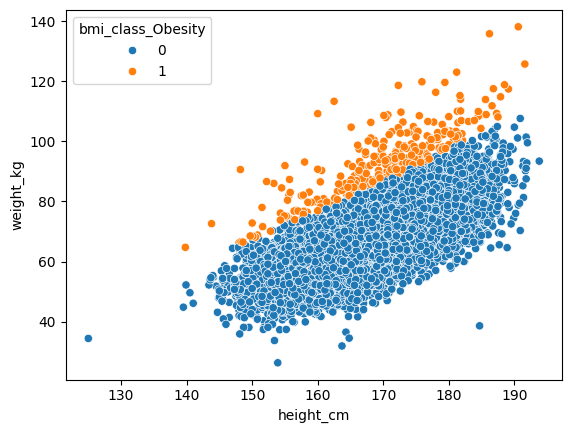

In [7]:
sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Obesity')

<Axes: xlabel='height_cm', ylabel='weight_kg'>

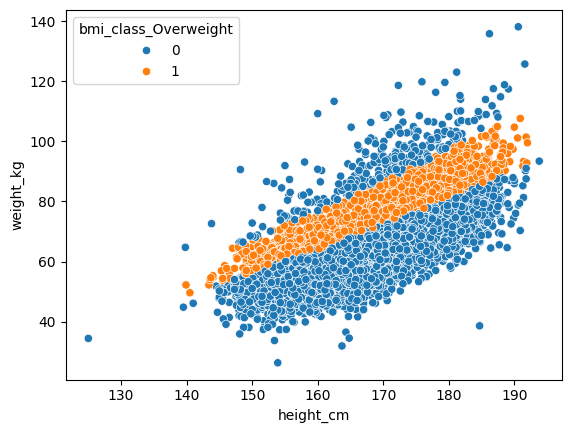

In [8]:
sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Overweight')

<Axes: xlabel='height_cm', ylabel='weight_kg'>

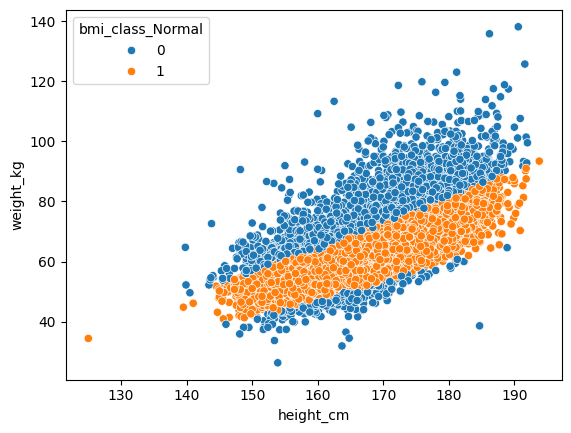

In [9]:
sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Normal')

<Axes: xlabel='height_cm', ylabel='weight_kg'>

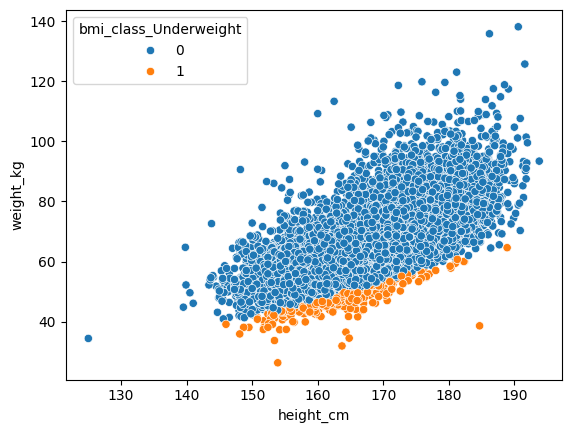

In [10]:

# sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Normal')
# sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Normal')
# sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Normal')
sns.scatterplot(df, x='height_cm',y='weight_kg', hue='bmi_class_Underweight')

#### Working with Model

Building<br>
Training<br>
Testing

In [31]:
dt = DecisionTreeRegressor()
dt.fit(X_train_trf, y_train)
y_pred = dt.predict(X_test_trf)
r2_score(y_test, y_pred)

0.8608079716463184

In [30]:
dtree = DecisionTreeRegressor()
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV with DecisionTreeRegressor and parameter grid
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train_trf, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_trf, y_test)
print("Test Score (R^2):", test_score)

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}
Test Score (R^2): 0.8685872716356666


# Practice with this model

In [32]:
best_model.get_depth()

7

In [33]:
best_model.get_n_leaves()

np.int64(103)

In [34]:
from sklearn.tree import plot_tree

[Text(0.49594594594594593, 0.9375, 'x[0] <= -0.102\nsquared_error = 141.959\nsamples = 10714\nvalue = 67.408'),
 Text(0.23547297297297298, 0.8125, 'x[1] <= -0.413\nsquared_error = 71.818\nsamples = 4682\nvalue = 58.629'),
 Text(0.36570945945945943, 0.875, 'True  '),
 Text(0.10878378378378378, 0.6875, 'x[4] <= 3.017\nsquared_error = 142.109\nsamples = 1098\nvalue = 65.627'),
 Text(0.05945945945945946, 0.5625, 'x[3] <= 0.553\nsquared_error = 52.914\nsamples = 881\nvalue = 70.523'),
 Text(0.02702702702702703, 0.4375, 'x[0] <= -1.012\nsquared_error = 74.576\nsamples = 92\nvalue = 82.682'),
 Text(0.010810810810810811, 0.3125, 'x[0] <= -1.964\nsquared_error = 46.313\nsamples = 41\nvalue = 77.13'),
 Text(0.005405405405405406, 0.1875, 'squared_error = 50.303\nsamples = 11\nvalue = 71.476'),
 Text(0.016216216216216217, 0.1875, 'x[0] <= -1.272\nsquared_error = 28.834\nsamples = 30\nvalue = 79.203'),
 Text(0.010810810810810811, 0.0625, 'squared_error = 33.229\nsamples = 18\nvalue = 78.67'),
 Text

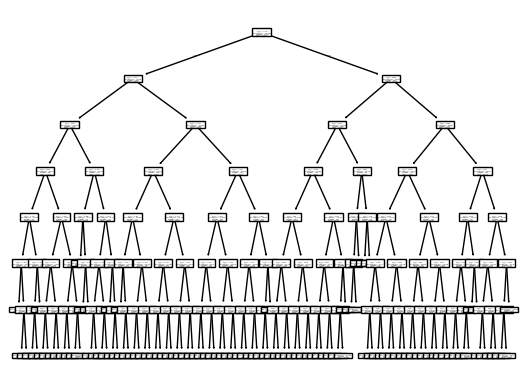

In [35]:
plot_tree(best_model)

list

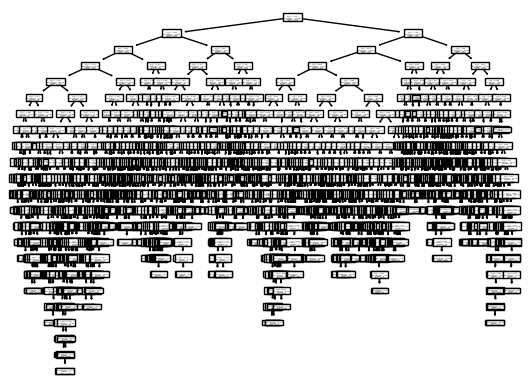

In [39]:
type(plot_tree(dt))

In [38]:
dt.get_n_leaves()

np.int64(1171)

***

In [48]:
def Dtree(
        X_train,
        y_train, 
        x_test, 
        y_test, 
        min_sample_leaf,
        min_impurity_decrease,
        max_features,
        splitter,
        max_depth) -> float:
    """ This function will plot the decision tree """

    dt = DecisionTreeRegressor(
        min_samples_leaf= min_sample_leaf,
        min_impurity_decrease= min_impurity_decrease,
        max_features = max_features,
        splitter= splitter,
        max_depth = max_depth
    )

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    # plot_decision_regions(X_train, y_train, dt)
    plot_tree(dt)
    return r2_score(y_test, y_pred)





0.5775424443748314

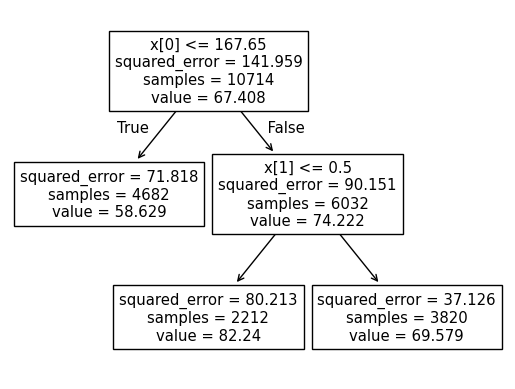

In [63]:
Dtree(X_train, y_train, X_test, y_test, min_sample_leaf=5, max_depth=7, max_features=4, min_impurity_decrease=10, splitter='best')